In [1]:
import os, mglearn
import pandas as pd

In [2]:
name1 = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country',
        'income']
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"adult.data"),header=None, index_col=False,names=name1)
data = data[['age','workclass','education','gender','hours-per-week','occupation','income']]
data.head()

age          workclass   education   gender  hours-per-week  \
0   39          State-gov   Bachelors     Male              40   
1   50   Self-emp-not-inc   Bachelors     Male              13   
2   38            Private     HS-grad     Male              40   
3   53            Private        11th     Male              40   
4   28            Private   Bachelors   Female              40   

           occupation  income  
0        Adm-clerical   <=50K  
1     Exec-managerial   <=50K  
2   Handlers-cleaners   <=50K  
3   Handlers-cleaners   <=50K  
4      Prof-specialty   <=50K

In [3]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [4]:
data.columns

Index(['age', 'workclass', 'education', 'gender', 'hours-per-week',
       'occupation', 'income'],
      dtype='object')

In [5]:
data_dummies = pd.get_dummies(data)
data_dummies.columns

Index(['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'gender_ Female', 'gender_ Male',
       'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
   

In [6]:
data_dummies[:10]

age  hours-per-week  workclass_ ?  workclass_ Federal-gov  \
0   39              40             0                       0   
1   50              13             0                       0   
2   38              40             0                       0   
3   53              40             0                       0   
4   28              40             0                       0   
5   37              40             0                       0   
6   49              16             0                       0   
7   52              45             0                       0   
8   31              50             0                       0   
9   42              40             0                       0   

   workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0                     0                        0                   0   
1                     0                        0                   0   
2                     0                        0                   1   
3                     0                        0                   1   
4                     0                        0                   1   
5                     0                        0                   1   
6                     0                        0                   1   
7                     0                        0                   0   
8                     0                        0                   1   
9                     0                        0                   1   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  workclass_ State-gov  \
0                        0                            0                     1   
1                        0                            1                     0   
2                        0                            0                     0   
3                        0                            0                     0   
4                        0                            0                     0   
5                        0                            0                     0   
6                        0                            0                     0   
7                        0                            1                     0   
8                        0                            0                     0   
9                        0                            0                     0   

   ...  occupation_ Machine-op-inspct  occupation_ Other-service  \
0  ...                              0                          0   
1  ...                              0                          0   
2  ...                              0                          0   
3  ...                              0                          0   
4  ...                              0                          0   
5  ...                              0                          0   
6  ...                              0                          1   
7  ...                              0                          0   
8  ...                              0                          0   
9  ...                              0                          0   

   occupation_ Priv-house-serv  occupation_ Prof-specialty  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           1   
5                            0                           0   
6                            0                           0   
7                            0                           0   
8                            0                           1   
9                            0                           0   

   occupation_ Protective-serv  occupation_ Sales  occupation_ Tech-support  \
0                            0                  0                         0   
1                      

In [7]:
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']

In [8]:
X = features.values

In [9]:
y = data_dummies['income_ >50K'].values

In [10]:
X.shape

(32561, 44)

In [11]:
y.shape

(32561,)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.8091143594153053

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [19]:
ct = ColumnTransformer([("scaling",StandardScaler(),['age','hours-per-week']),("onehot",OneHotEncoder(sparse=False),['workclass','education','gender','occupation'])])

In [20]:
data_features = data.drop("income",axis=1)
data_features[:3]

age          workclass   education gender  hours-per-week  \
0   39          State-gov   Bachelors   Male              40   
1   50   Self-emp-not-inc   Bachelors   Male              13   
2   38            Private     HS-grad   Male              40   

           occupation  
0        Adm-clerical  
1     Exec-managerial  
2   Handlers-cleaners

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data_features,data.income,random_state=0)

In [22]:
X_train.shape

(24420, 6)

In [23]:
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_train_trans[:3]

array([[ 1.49894077, -0.44509689,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [ 2.38045121, -1.66848877,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.

In [24]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_trans,y_train)

LogisticRegression(max_iter=1000)

In [26]:
X_test_trans = ct.transform(X_test)

In [27]:
lr.score(X_test_trans,y_test)

0.808991524382754

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [29]:
X, y = mglearn.datasets.make_wave(n_samples=120)

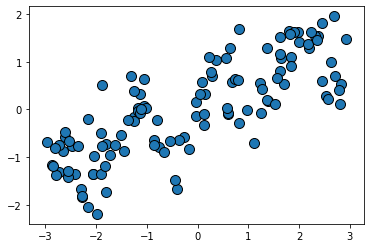

In [31]:
mglearn.discrete_scatter(X,y)

In [35]:
import numpy as np
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)
line

array([[-3.   ],
       [-2.994],
       [-2.988],
       [-2.982],
       [-2.976],
       [-2.97 ],
       [-2.964],
       [-2.958],
       [-2.952],
       [-2.946],
       [-2.94 ],
       [-2.934],
       [-2.928],
       [-2.922],
       [-2.916],
       [-2.91 ],
       [-2.904],
       [-2.898],
       [-2.892],
       [-2.886],
       [-2.88 ],
       [-2.874],
       [-2.868],
       [-2.862],
       [-2.856],
       [-2.85 ],
       [-2.844],
       [-2.838],
       [-2.832],
       [-2.826],
       [-2.82 ],
       [-2.814],
       [-2.808],
       [-2.802],
       [-2.796],
       [-2.79 ],
       [-2.784],
       [-2.778],
       [-2.772],
       [-2.766],
       [-2.76 ],
       [-2.754],
       [-2.748],
       [-2.742],
       [-2.736],
       [-2.73 ],
       [-2.724],
       [-2.718],
       [-2.712],
       [-2.706],
       [-2.7  ],
       [-2.694],
       [-2.688],
       [-2.682],
       [-2.676],
       [-2.67 ],
       [-2.664],
       [-2.658],
       [-2.652

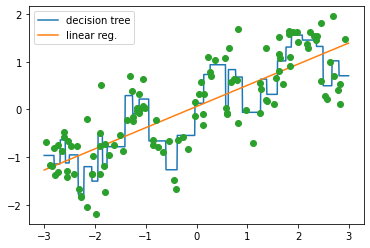

In [38]:
import matplotlib.pyplot as plt
dtr = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line,dtr.predict(line),label="decision tree")
lr = LinearRegression().fit(X,y)
plt.plot(line,lr.predict(line),label="linear reg.")
plt.plot(X[:,0],y,'o')
plt.legend()

In [40]:
from sklearn.preprocessing import KBinsDiscretizer

In [41]:
kb = KBinsDiscretizer(n_bins=10,strategy='uniform')
kb.fit(X)
kb.bin_edges_

array([array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
              -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
               2.92132162])                                                   ],
      dtype=object)

In [42]:
X_binned = kb.transform(X)
print(X[:10])
print(X_binned.toarray()[:10])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [47]:
kb = KBinsDiscretizer(n_bins=10,strategy='uniform',encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

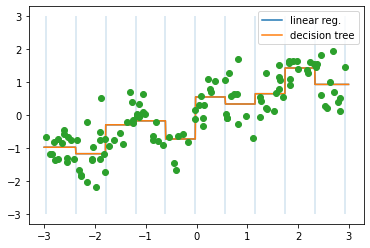

In [49]:
line_binned = kb.transform(line)
lr=LinearRegression().fit(X_binned,y)
plt.plot(line, lr.predict(line_binned), label='linear reg.')

dtr = DecisionTreeRegressor(min_samples_leaf=3).fit(X_binned,y)
plt.plot(line, dtr.predict(line_binned), label='decision tree')

plt.plot(X[:,0],y,'o')
plt.vlines(kb.bin_edges_[0], -3,3, alpha=0.2)
plt.legend()